In [67]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

#### Q1. Use the random number generator discussed in class to do the following:

a) Using the LGM method generate 10,000 Uniformly distributed random numbers on [0,1] and
compute the empirical mean and the standard deviation of the sequence.

In [68]:
def LCG(N, S):
    a = 7**5
    m = 2**31 - 1
    def f(S):
        return (a*S) % m
    U = []
    for i in range(N):
        S = f(S)
        U += [S/m]
    return U

(array([ 989., 1002., 1049.,  985., 1048.,  984., 1015., 1017.,  978.,
         933.]),
 array([9.54833813e-05, 1.00085800e-01, 2.00076117e-01, 3.00066433e-01,
        4.00056750e-01, 5.00047066e-01, 6.00037383e-01, 7.00027700e-01,
        8.00018016e-01, 9.00008333e-01, 9.99998650e-01]),
 <BarContainer object of 10 artists>)

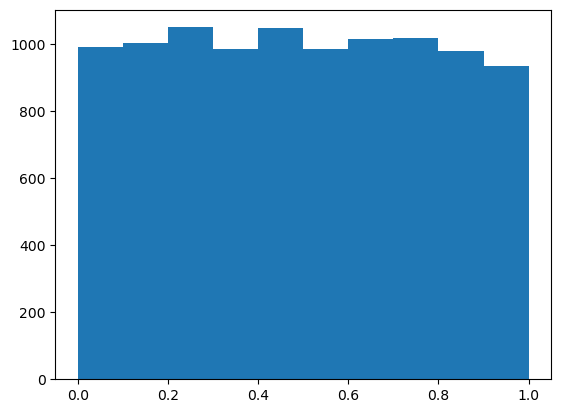

In [69]:
rand_nums_uniform = LCG(10**4, 25)
plt.hist(rand_nums_uniform)

b) Use built-in functions of the software you are using to do the same thing as in (a).

(array([ 944., 1000.,  984., 1013., 1036.,  982.,  988., 1009.,  989.,
        1055.]),
 array([4.66765424e-05, 1.00020778e-01, 1.99994880e-01, 2.99968982e-01,
        3.99943084e-01, 4.99917186e-01, 5.99891288e-01, 6.99865389e-01,
        7.99839491e-01, 8.99813593e-01, 9.99787695e-01]),
 <BarContainer object of 10 artists>)

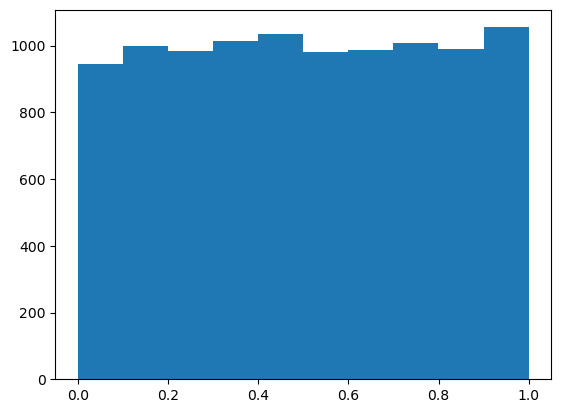

In [70]:
np.random.seed(25)
rand_nums_2 = np.random.uniform(0, 1, 10**4)
plt.hist(rand_nums_2)

c) Compare your findings in (a) and (b) and comment (be short, but precise).

We can see from the two histograms above that with a sample size of 10,000 values, both methods yield a histogram that is not exactly uniform. We find that both methods are not perfectly uniform as if this were the case, then we would have found the histogram to be flat across 100 or so. 

#### Q2. Use the numbers from part a) to do the following:

a) Generate 10,000 random numbers with the following distribution:
$X = \begin{cases}
-1\space\text{with probability}\space0.3\\
0\space\text{with probability}\space0.35\\
1\space\text{with probability}\space0.2\\
2\space\text{with probability}\space0.15\\
\end{cases}$

In [71]:
outcomes = []
for i in rand_nums_uniform:
    if i <= 0.15:
        outcomes.append(2)
    elif i > 0.15 and i <= 0.35:
        outcomes.append(1)
    elif i > 0.35 and i <= 0.7:
        outcomes.append(0)
    else:
        outcomes.append(-1)

b) Draw the histogram and compute the empirical mean and standard deviation of the sequence
of 10,000 numbers generated in part (a).

(array([2928.,    0.,    0., 3544.,    0.,    0., 2059.,    0.,    0.,
        1469.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <BarContainer object of 10 artists>)

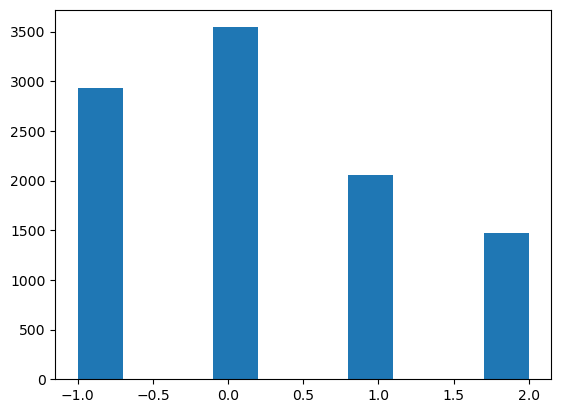

In [72]:
plt.hist(outcomes)

In [73]:
mean = np.mean(outcomes)
std = np.std(outcomes)
print("mean", mean)
print("std", std)

mean 0.2069
std 1.0215147527079578


#### Q3. Using the LGM method generate Uniformly distributed random numbers on [0,1] to do the following:

(a) Generate 1,000 random numbers with Binomial distribution with $n$ = 44 and $p$ = 0.64.

In [74]:
binomial_outcomes = []
for i in range(1, 1001):
    rand_nums = LCG(44, i)
    outcomes = []
    for j in rand_nums:
        outcomes.append(1) if j <= 0.64 else outcomes.append(0)
    total = np.sum(outcomes)
    binomial_outcomes.append(total)

(b) Compute the probability that the random variable X that has Binomial (44, 0.64) distribution,
is at least 40: $P(X ≥ 40)$. Use any statistics textbook or online resources for the exact
number for the above probability, compare it with your finding and comment on the
approximation.

In [75]:
count = 0
for i in binomial_outcomes:
    if i >= 40:
        count += 1
prob = count/len(binomial_outcomes)
print(prob, count)

0.0 0


In [76]:
from scipy.stats import binom

true_prob = 1 - binom.cdf(k=40, n=44, p=0.64)
f"{true_prob:.8f}"

'0.00000795'

We see that our empirical finding is that the probability is exactly 0 but the true probability is very close to 0 but not exactly 0. Perhaps if we had more data points (approximately 1 million), we would find our empirical finding close to the true probability value.

#### Q4. Using the LGM method generate Uniformly distributed random numbers on [0,1] to do the following:

#### (a) Generate 10,000 Exponentially distributed random numbers with parameter 𝜆 = 1.5.

In [77]:
def exp(lamb, u):
    x_i = (-1 / lamb) * np.log(1 - u)
    return x_i
exp_list = []
for i in rand_nums_uniform:
    exp_rand_num = exp(1.5, i)
    exp_list.append(exp_rand_num)

#### (b) Estimate $P(X ≥ 2)$.

In [78]:
count = 0
for i in exp_list:
    if i >= 2:
        count += 1
print("P(X >= 2) is", count/len(exp_list))

P(X >= 2) is 0.0488


#### (c) Compute the empirical mean and the standard deviation of the sequence of 10,000 numbers generated in part (a). Draw the histogram by using the 10,000 numbers of part (a).

(array([7.484e+03, 1.878e+03, 4.760e+02, 1.300e+02, 2.400e+01, 3.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([6.36586268e-05, 9.01063731e-01, 1.80206380e+00, 2.70306388e+00,
        3.60406395e+00, 4.50506402e+00, 5.40606410e+00, 6.30706417e+00,
        7.20806424e+00, 8.10906431e+00, 9.01006439e+00]),
 <BarContainer object of 10 artists>)

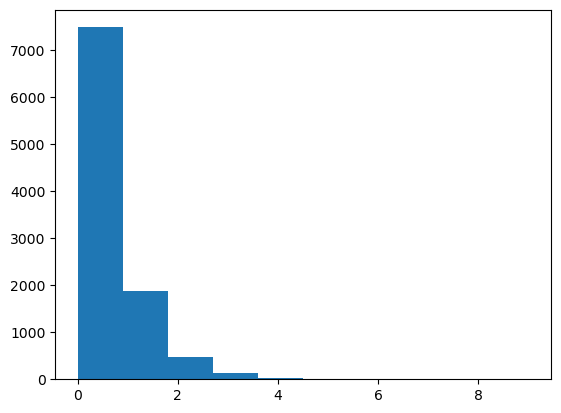

In [79]:
exponential_mean = np.mean(exp_list)
exponential_std = np.std(exp_list)
plt.hist(exp_list)

In [80]:
print("Exponential mean: ", exponential_mean)
print("Exponential std: ", exponential_std)

Exponential mean:  0.654247142780399
Exponential std:  0.6531976303257775


#### Q5. Using the LGM method generate Uniformly distributed random numbers on [0,1] to do the following:

#### (a) Generate 5,000 Normally distributed random numbers with mean 0 and variance 1, by the Box- Muller Method.

In [81]:
rand_num_uniform = rand_nums_uniform[0:5000]
def box_muller(u1, u2):
    z1 = np.sqrt(-2 * np.log(u1)) * math.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * math.sin(2 * np.pi * u2)
    return [z1, z2]

In [82]:
rand_1 = rand_num_uniform[0:2500]
rand_2 = rand_num_uniform[2500:5000]
stand_norm_list_bm = []
start_time = time.time()
for i in range(0, 2500):
    stand_norm_pair = box_muller(rand_1[i], rand_2[i])
    stand_norm_list_bm.append(stand_norm_pair[0])
    stand_norm_list_bm.append(stand_norm_pair[1])
bm_time = time.time() - start_time

#### (b) Use the Polar-Marsaglia method to Generate 5,000 Normally distributed random numbers with mean 0 and variance 1.

In [83]:
rand_1 = rand_num_uniform[0:2500]
rand_2 = rand_num_uniform[2500:5000]
stand_norm_list_pm = []
start_time = time.time()
for i in range(0, 2500):
    v1 = 2*rand_1[i] - 1
    v2 = 2*rand_2[i] - 1
    w = v1**2 + v2**2
    if w <= 1:
        z1 = v1*np.sqrt((-2 * np.log(w))/w)
        z2 = v2*np.sqrt((-2 * np.log(w))/w)
        stand_norm_list_pm.append(z1)
        stand_norm_list_pm.append(z2)
pm_time = time.time() - start_time

#### (c) Now compare the efficiencies of the two above-algorithms, by comparing the execution times to generate 5,000 normally distributed random numbers by the two methods. Which one is more efficient? If you do not see a clear difference, you need to increase the number of generated realizations of random variables to 20,000, 50,000, 100,000, etc.

In [84]:
print("Time execution for Box Muller: ", bm_time)
print("Time execution for Polar-Marsaglia: ", pm_time)

Time execution for Box Muller:  0.019927024841308594
Time execution for Polar-Marsaglia:  0.011594057083129883


In [85]:
print("Polar-Marsaglia is faster than Box Muller by: ", bm_time - pm_time, "seconds")

Polar-Marsaglia is faster than Box Muller by:  0.008332967758178711 seconds


We see that that the Polar-Marsaglia method is faster than the Box Muller method by 0.0118 seconds. This is perhaps due to the fact that in the Polar-Marsaglia method, we are removing some of the potential standard normal values based on the rejection area.